## Cement Compressive Strenght Predition

### Problem Statement

The quality of concrete is determined by its compressive strength, which is measured 
using a conventional crushing test on a concrete cylinder. The strength of the concrete 
is also a vital aspect in achieving the requisite longevity. It will take 28 days to test 
strength, which is a long period. So, what will we do now? We can save a lot of time and 
effort by using Data Science to estimate how much quantity of which raw material we 
need for acceptable compressive strength.

### Data Characteristics:

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).

Summary Statistics:

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None

### Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description.
The concrete compressive strength is the regression problem. The order of this listing
corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

In [2]:
# Standard import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('D:/concrete_data.csv')

In [7]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [8]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

C:\conda_temp\ipykernel_10680\1484073311.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\conda_temp\ipykernel_10680\1484073311.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\conda_temp\ipykernel_10680\1484073311.py:9: UserWarning: 

`distplot` is a deprecat

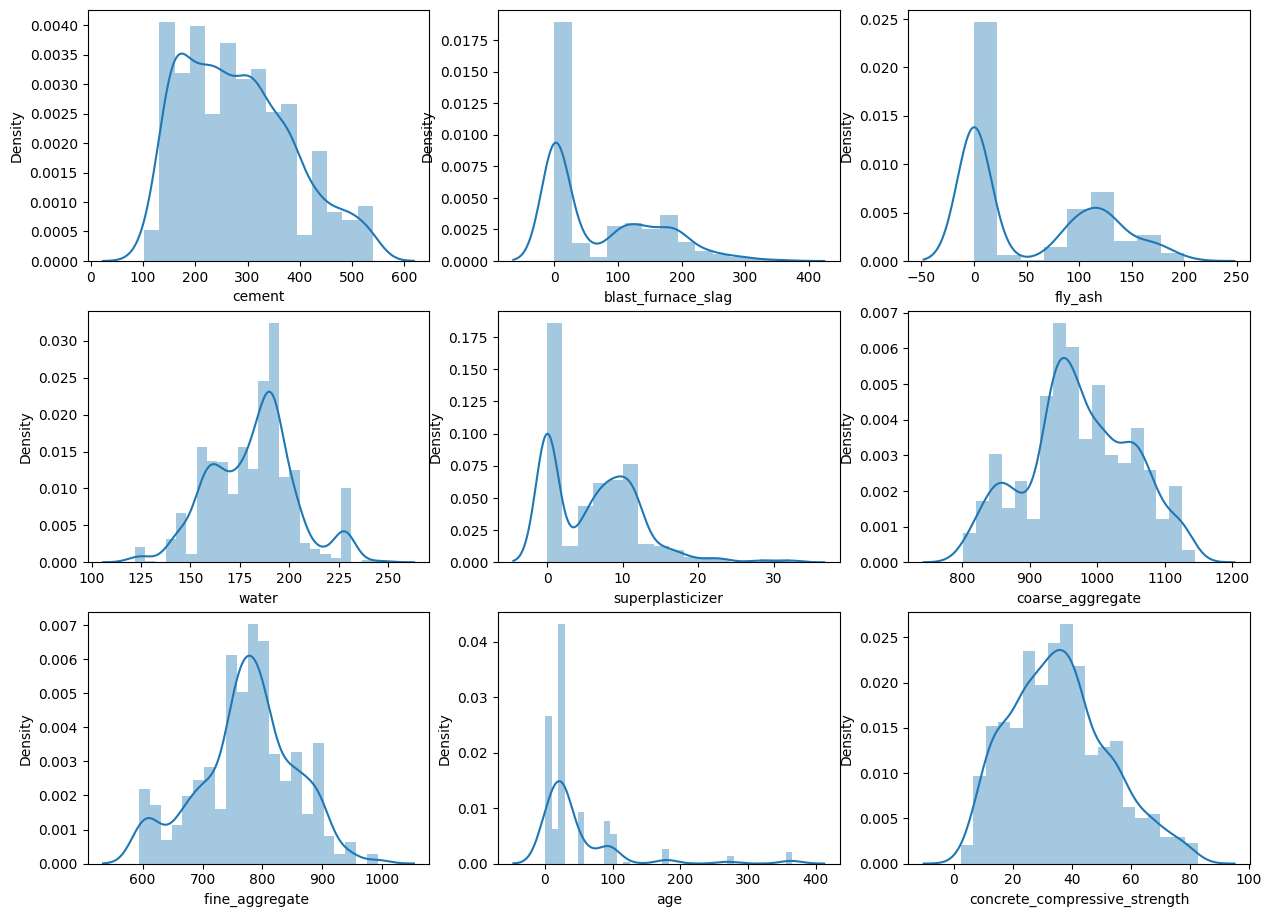

In [10]:
from matplotlib.pyplot import plot


plt.figure(figsize=(15,15),facecolor='white')
plotnumber =1

for column in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

### Data Transformation 

In [12]:
X = df.drop('concrete_compressive_strength',axis=1)

In [13]:
y =df['concrete_compressive_strength']

In [14]:
## Add 1 Log Transformation for normalization
for column in X.columns:
    X[column]+=1
    X[column] = np.log(X[column])

C:\conda_temp\ipykernel_10680\1741795178.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[column])
C:\conda_temp\ipykernel_10680\1741795178.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[column])
C:\conda_temp\ipykernel_10680\1741795178.py:6: UserWarning: 

`distplot` is a deprecated

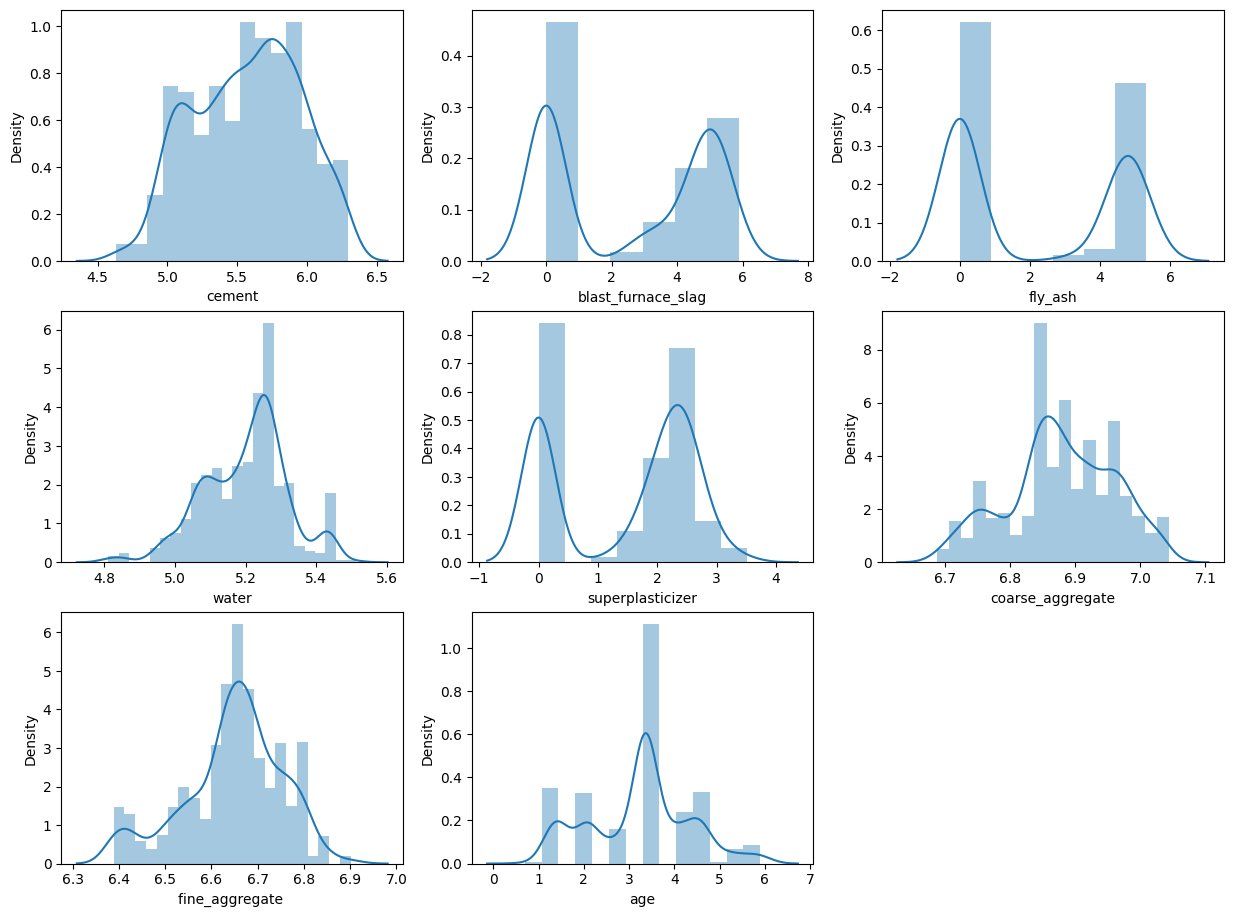

In [15]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(X[column])
    plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

We can see in above plot that data is normalized

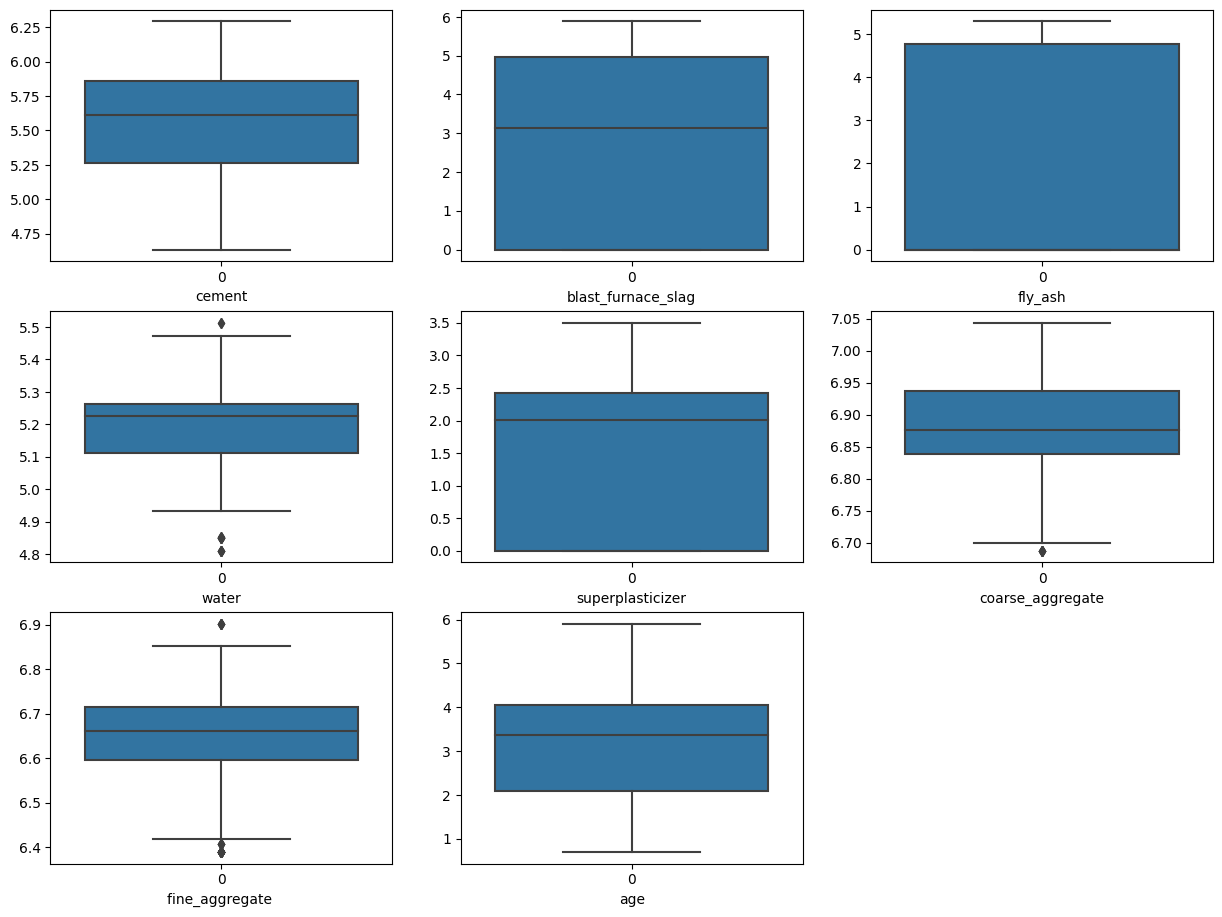

In [16]:
# checking for outliers
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot((X[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

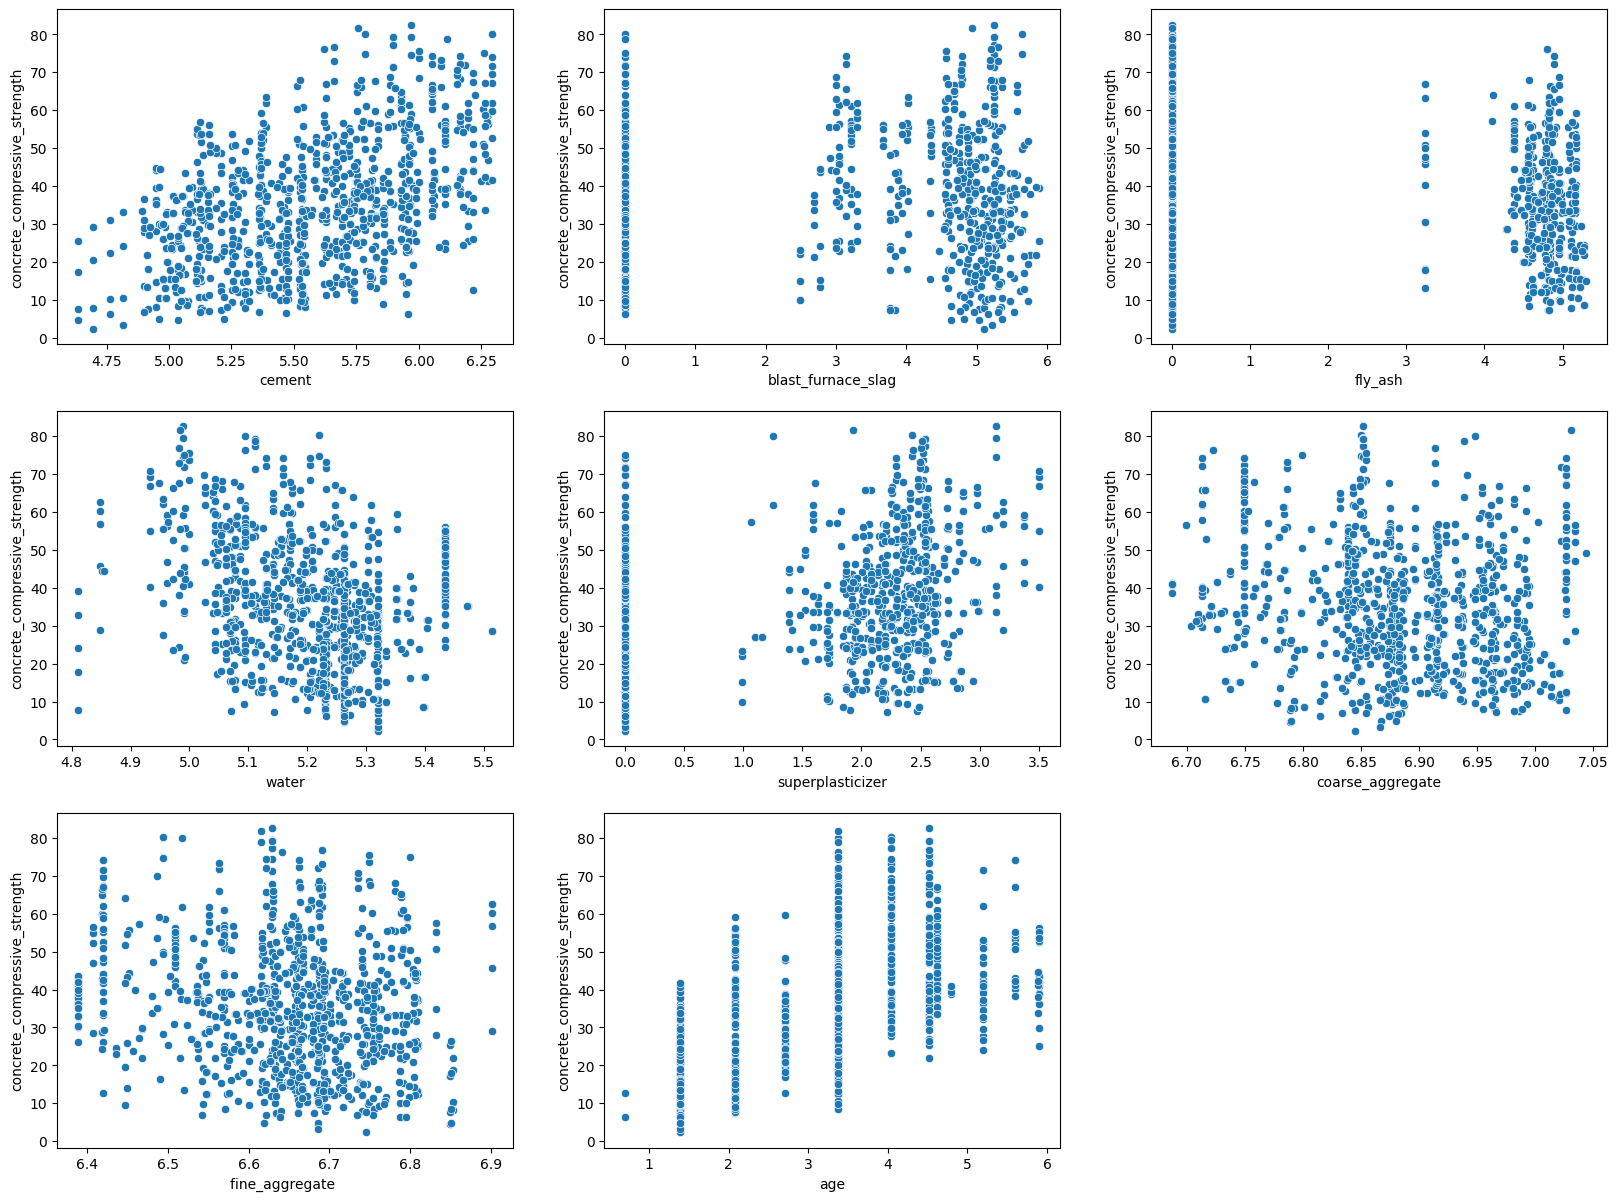

In [20]:
# Checking feature relation with target column
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.scatterplot(x=X[column],y=y)
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

<AxesSubplot: >

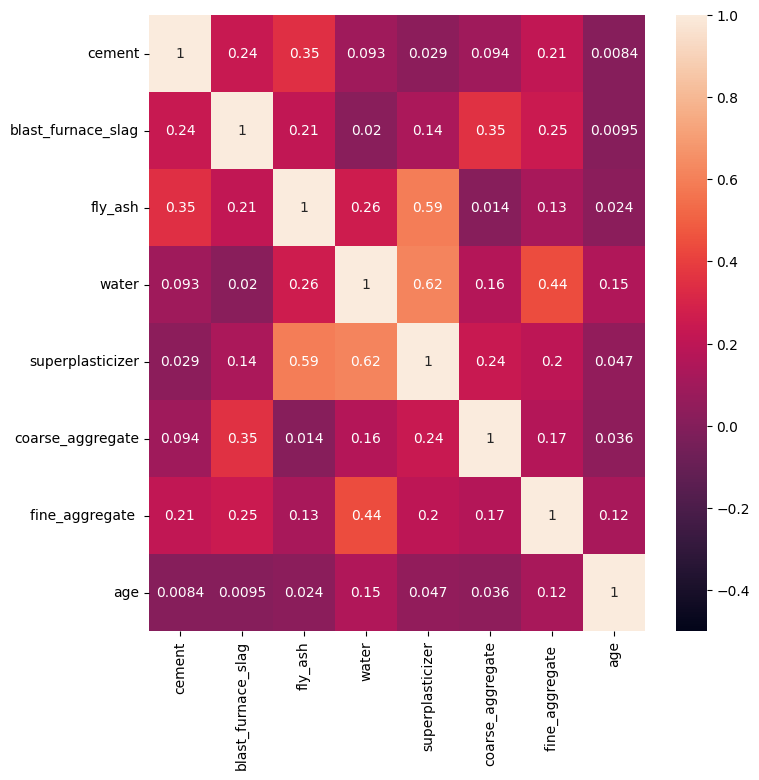

In [21]:
## Checking correlation for every variable

plt.figure(figsize=(8,8))

sns.heatmap(X.corr().abs(), vmin=-0.5, vmax = 1, annot = True)

In [22]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=36)

x_train = pd.DataFrame(scalar.fit_transform(x_train),columns =x_train.columns,index=x_train.index)
x_test = pd.DataFrame(scalar.fit_transform(x_test),columns =x_test.columns,index=x_test.index)

In [32]:
x_test


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
377,0.960217,-1.077364,-0.927143,1.461817,-1.309497,0.422971,-0.080417,0.733205
520,0.226717,0.074471,1.152018,-0.063138,0.325882,-1.710491,0.392789,-1.637907
950,0.591162,-1.077364,1.142758,0.827158,0.846863,-2.315842,0.290571,0.130105
51,-0.822620,1.104623,-0.927143,1.971328,-1.309497,-0.475799,-1.318084,1.764422
724,0.455621,-1.077364,-0.927143,0.526109,-1.309497,0.525535,0.733556,1.150717
...,...,...,...,...,...,...,...,...
799,1.907190,-1.077364,-0.927143,-0.349607,-1.309497,1.812773,-2.169726,-1.637907
963,-1.438756,1.195668,-0.927143,-0.310845,0.924733,1.195264,-1.249702,0.130105
583,-0.552832,1.315226,-0.927143,0.245677,-1.309497,0.097550,-1.046044,0.130105
567,-0.643556,0.965666,-0.927143,0.245677,-1.309497,1.273481,-0.119453,-1.019284


In [33]:
x_train

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
945,-1.660102,0.978813,1.074508,0.883028,0.600032,-0.720500,-0.197581,0.103867
188,-0.440946,-1.050405,1.046906,0.409302,0.234591,-0.038804,1.146472,1.233730
529,0.821131,0.191511,1.204794,-1.320357,0.900601,-0.369031,0.373258,0.715741
917,-1.512252,1.093080,-0.887777,-0.443042,-0.288470,0.381308,0.682175,0.103867
117,0.462044,1.259912,-0.887777,-0.225323,0.715262,0.956914,-2.137052,0.103867
...,...,...,...,...,...,...,...,...
986,0.097155,0.883269,0.977036,1.267769,0.750489,-0.886091,-1.156671,0.103867
936,-0.274606,0.827298,0.920944,2.638419,0.442699,-1.616724,-0.943933,0.103867
926,-1.274713,1.176056,1.268181,0.953922,0.832736,-2.110648,-1.152560,0.103867
610,-0.284631,-1.050405,-0.887777,0.571635,-1.236508,-0.027123,1.302562,2.399529
